In [1]:
import matplotlib.pyplot as plt

import healpy as hp

import pathlib

import numpy as np

from scipy import stats as ss

In [2]:
data_dir = pathlib.Path("/pscratch/sd/o/omard/SKYSIMS/GIULIOSIMS/")

In [3]:
keyB, keyBr, keyPB, keyPBr = 'NL Born', 'NL Born randomized', 'NL Post-Born', 'NL Post-Born randomized'
maps = {keyB: 'map0_kappa_ecp262_dmn2_lmax8000_first.fits',
       keyBr: 'map0_kappa_ecp262_dmn2_lmax8000_first_randomized.fits',
       keyPB: 'map0_kappa_ecp262_dmn2_lmax8000.fits',
       keyPBr: 'map0_kappa_ecp262_dmn2_lmax8000_randomized.fits'}

In [11]:
fwhms = np.arange(0.5, 6, 1.)
fwhms_deg = fwhms/60 #arcmin to deg
fwhms_rad = np.deg2rad(fwhms_deg)

In [12]:
#nside_ = 2048 #some resolution setting
#lmax = 3*nside_-1

lmax = 4000

hp.

In [13]:
results = {}
for k, map_in_str in maps.items():
    print('Doing', k)
    map_in = hp.read_map(data_dir/map_in_str)
    values = []
    for fwhm, fwhm_rad in zip(fwhms, fwhms_rad):
        print(' Working on fwhm', fwhm)
        smoothed = hp.sphtfunc.smoothing(map_in, fwhm_rad, pol = False, lmax = lmax)
        skew_ = ss.skew(smoothed, axis = 0)
        values += [skew_]
    results[k] = values
np.save('results', results)


Doing NL Born
 Working on fwhm 0.5
 Working on fwhm 1.5
 Working on fwhm 2.5
 Working on fwhm 3.5
 Working on fwhm 4.5
 Working on fwhm 5.5
Doing NL Born randomized
 Working on fwhm 0.5
 Working on fwhm 1.5
 Working on fwhm 2.5
 Working on fwhm 3.5
 Working on fwhm 4.5
 Working on fwhm 5.5
Doing NL Post-Born
 Working on fwhm 0.5
 Working on fwhm 1.5
 Working on fwhm 2.5
 Working on fwhm 3.5
 Working on fwhm 4.5
 Working on fwhm 5.5
Doing NL Post-Born randomized
 Working on fwhm 0.5
 Working on fwhm 1.5
 Working on fwhm 2.5
 Working on fwhm 3.5
 Working on fwhm 4.5
 Working on fwhm 5.5


In [14]:
#Do the same for Born pure Gaussian sims
results_G_Born = {}
N = 2
for i in range(N):
    print('Doing', i)
    map_in = hp.read_map(data_dir/'bornGaussian'/f'born_kappa_gauss_{i}.fits')
    values = []
    for fwhm, fwhm_rad in zip(fwhms, fwhms_rad):
        print(' Working on fwhm', fwhm)
        smoothed = hp.sphtfunc.smoothing(map_in, fwhm_rad, pol = False, lmax = lmax)
        skew_ = ss.skew(smoothed, axis = 0)
        values += [skew_]
    results_G_Born[i] = values
np.save('resultsG', results_G_Born)

Doing 0
 Working on fwhm 0.5
 Working on fwhm 1.5
 Working on fwhm 2.5
 Working on fwhm 3.5
 Working on fwhm 4.5
 Working on fwhm 5.5
Doing 1
 Working on fwhm 0.5
 Working on fwhm 1.5
 Working on fwhm 2.5
 Working on fwhm 3.5
 Working on fwhm 4.5
 Working on fwhm 5.5


In [18]:
keys = [keyB, keyBr]

In [19]:
results = np.load('results.npy', allow_pickle = True).take(0)
results_G_Born = np.load('resultsG.npy', allow_pickle = True).take(0)

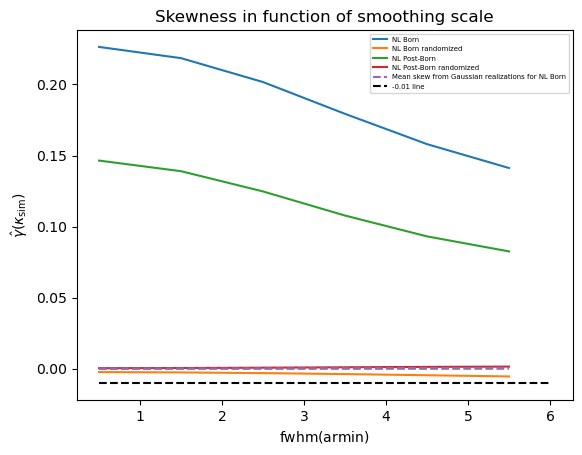

In [38]:
plt.title('Skewness in function of smoothing scale')
for k in [keyB, keyBr, keyPB, keyPBr]:
    skews = results[k]
    plt.plot(fwhms, skews, label = k)
plt.hlines(0, fwhms.min(), fwhms.max(), ls = '--', color = 'k', alpha = 0.4)

meanskew = 0
for i in range(N):
    meanskew += np.array(results_G_Born[i])
meanskew /= N
plt.plot(fwhms, meanskew, label = 'Mean skew from Gaussian realizations for NL Born', ls = '--')

plt.ylabel(r'$\hat{\gamma}(\kappa_{\rm{sim}})$')
plt.xlabel(r'$\rm{fwhm} (armin)$')

plt.hlines(-0.01, 0.5, 6, color = 'k', ls = '--', label = '-0.01 line')

plt.legend(fontsize = 5)
plt.savefig('empirical_skew_demuni.png', dpi = 300)

In [ ]:
import cmblensplus